In [1]:
import numpy as np
import pandas as pd

# The schema name for the 2 column since the name for the same column changes every years
# Years Program: "How long has it been since you first learned how to program?"
# Years Coded Job: "For how many years have you coded as part of your job?"
df_schema_years = ["YearsProgram","YearsCoding","YearsCode","YearsCode"]
df_schema_yearsPro = ["YearsCodedJob","YearsCodingProf","YearsCodePro","YearsCodePro"]
# data fram for 4 years (2017,2018,2019,2020)
df = [None] * 4
df[0] = pd.read_csv('./survey_results_public.csv')
df[1] = pd.read_csv('./survey_results_project_2018.csv')
df[2] = pd.read_csv('./survey_results_project_2019.csv')
df[3] = pd.read_csv('./survey_results_project_2020.csv')

# clean the data
df[0].dropna(subset = ["Salary","YearsProgram","YearsCodedJob"], inplace=True)

# extract the approriate columns
exp = df[0][["Salary","YearsProgram","YearsCodedJob","CareerSatisfaction"]]

# Params: 
#   1) years: the name for the Years Program column
#   2) yearsPro: the name for the Years Coded Job column
#
# Output: return a list of the difference between the Years Program and Years Coded Job
def get_YearsProgramPrior(df, years, yearsPro):
    arr = []
    for index, row in df.iterrows():
        if (row[years] == "Less than a year"):
            program = 1
        else:
            temp = row[years].replace("-"," ")
            digits = [int(s) for s in temp.split() if s.isdigit()]
            if len(digits) == 2:
                program = digits[1]
            else:
                program = digits[0]
    
        if (row[yearsPro] == "Less than a year"):
            codedjob = 1
        else:
            temp = row[yearsPro].replace("-"," ")
            digits = [int(s) for s in temp.split() if s.isdigit()]
            if len(digits) == 2:
                codedjob = digits[1]
            else:
                codedjob = digits[0]
        arr.append(program-codedjob)
    return arr

# add the YearsProgramPrior column into the data
arr = get_YearsProgramPrior(df[0],df_schema_years[0],df_schema_yearsPro[0])
exp.insert(loc=3,column="YearsProgramPrior", value=arr)
exp = exp[exp["YearsProgramPrior"] >= 0]

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#get the percentage of each YearsProgramPrior values
print(exp['YearsProgramPrior'].value_counts(normalize=True).sort_index()*100)

0     14.384117
1      9.542139
2     10.251216
3     11.324959
4     11.264182
5      9.683955
6      7.435170
7      6.280389
8      4.821718
9      4.882496
10     3.383306
11     2.086710
12     1.519449
13     0.992707
14     0.688817
15     0.648298
16     0.425446
17     0.101297
18     0.202593
19     0.081037
Name: YearsProgramPrior, dtype: float64


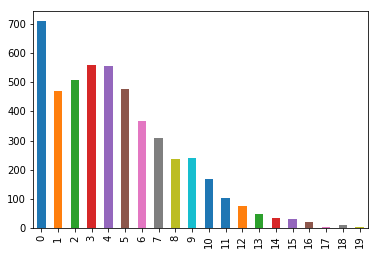

In [4]:
#plot the sum of each YearsProgramPrior values
exp['YearsProgramPrior'].value_counts().sort_index().plot(kind="bar")

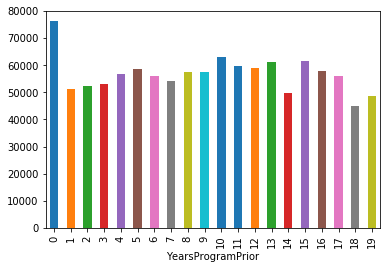

In [5]:
#plot the mean salary for each YearsProgramPrior values
exp.groupby('YearsProgramPrior')['Salary'].mean().plot(kind='bar')

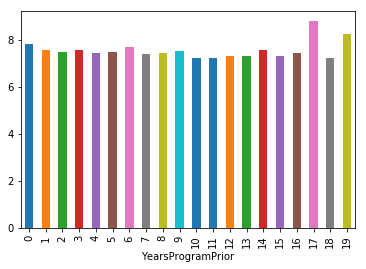

In [6]:
#plot the mean Career Satisfaction for each YearsProgramPrior values
exp.groupby('YearsProgramPrior')["CareerSatisfaction"].mean().plot(kind="bar")

AxesSubplot(0.125,0.125;0.775x0.755)


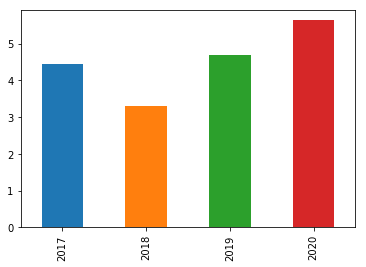

In [7]:
#plot the average YearsProgramPrior for each year(2017 -> 2020)
out = [None] * 4
for i in range(4):
    df[i].dropna(subset = [df_schema_years[i],df_schema_yearsPro[i]], inplace=True)
    temp = get_YearsProgramPrior(df[i],df_schema_years[i],df_schema_yearsPro[i])
    out[i] = sum(temp) / len(temp)
print(pd.Series(out,index=["2017","2018","2019","2020"]).plot(kind="bar"))